# CSE 4502/5717: Big Data Analytics
## Tutorial C: Extra Credit

The MNIST dataset is a public dataset of grayscale images (28x28 pixels) of digits handwritten by high school students and employees of the US Census Bureau. Each image is labelled with the digit it represents.

The code below import images from the MNIST dataset in the matrix X and the corresponding labels in the vector Y. Note that each image is a row of 784 numbers in X, and each number is the grayscale value of one of the 784 pixels forming the image.

### Preprocessing the MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Turn down for faster convergence
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Inspecting the data

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

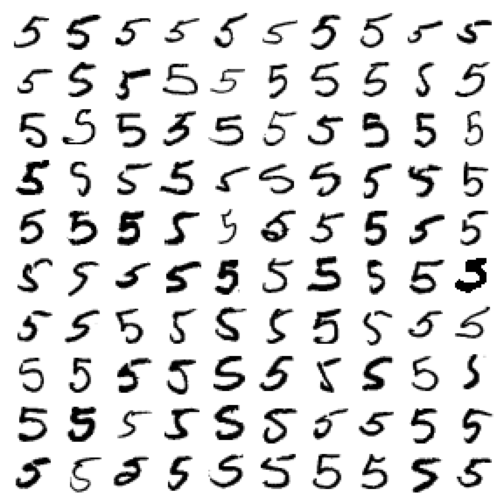

In [3]:
digit = '5'
plt.figure(figsize=(9,9))
X_0 = X[(y == digit)]
example_images = X_0[:100]
plot_digits(example_images, images_per_row=10)


### Design classifiers to predict the represented digit based on grayscale value of the 784 pixels forming the image.
#### Support Vector Machine with soft margins
Use a soft-margin SVM and vary the regularization parameter using the values given below.

In [4]:
regularization = [0.01, 0.1, 10, 100]

In [11]:
# add code here

#  Let us define and fit the SVM Classifier model
from sklearn.svm import SVC

svm_clf1 = SVC(kernel="linear", C=0.01, gamma='scale')
svm_clf1.fit(X_train,y_train)
y_pred1 = svm_clf1.predict(X_test)

svm_clf2 = SVC(kernel="linear", C=0.1, gamma='scale')
svm_clf2.fit(X_train,y_train)
y_pred2 = svm_clf2.predict(X_test)

svm_clf3 = SVC(kernel="linear", C=10, gamma='scale')
svm_clf3.fit(X_train,y_train)
y_pred3 = svm_clf3.predict(X_test)

svm_clf4 = SVC(kernel="linear", C=100, gamma='scale')
svm_clf4.fit(X_train,y_train)
y_pred4 = svm_clf4.predict(X_test)


# 4. Let us plot the decision boundaries
W1 = svm_clf1.coef_[0]                           # Coefficients
b1 = svm_clf1.intercept_[0]                      # Intercept
W2 = svm_clf2.coef_[0]                           # Coefficients
b2 = svm_clf2.intercept_[0]                      # Intercept
W3 = svm_clf3.coef_[0]                           # Coefficients
b3 = svm_clf3.intercept_[0]                      # Intercept
W4 = svm_clf4.coef_[0]                           # Coefficients
b4 = svm_clf4.intercept_[0]                      # Intercept


# W1*X1 + W2*X2 + b = 0 ===> X2 = -(b + W1*X1)/W2
x0 = np.linspace(4, 7.5, 200)
decision_boundary1 = -W1[0]/W1[1] * x0 - b1/W1[1]
decision_boundary2 = -W2[0]/W2[1] * x0 - b2/W2[1]
decision_boundary3 = -W3[0]/W3[1] * x0 - b3/W3[1]
decision_boundary4 = -W4[0]/W4[1] * x0 - b4/W4[1]

# Support Vectors
margin1 = 2/W1[1]
gutter_up1 = decision_boundary1 + 0.5*margin1
gutter_down1 = decision_boundary1 - 0.5*margin1
SVS1 = svm_clf1.support_vectors_

margin2 = 2/W2[1]
gutter_up2 = decision_boundary2 + 0.5*margin2
gutter_down2 = decision_boundary2 - 0.5*margin2
SVS2 = svm_clf2.support_vectors_

margin3 = 2/W3[1]
gutter_up3 = decision_boundary3 + 0.5*margin3
gutter_down3 = decision_boundary3 - 0.5*margin3
SVS3 = svm_clf3.support_vectors_

margin4 = 2/W4[1]
gutter_up4 = decision_boundary4 + 0.5*margin4
gutter_down4 = decision_boundary4 - 0.5*margin4
SVS4 = svm_clf4.support_vectors_




<ipython-input-11-d6a51e070623>:36: RuntimeWarning: invalid value encountered in double_scalars
  decision_boundary1 = -W1[0]/W1[1] * x0 - b1/W1[1]
<ipython-input-11-d6a51e070623>:36: RuntimeWarning: divide by zero encountered in double_scalars
  decision_boundary1 = -W1[0]/W1[1] * x0 - b1/W1[1]
<ipython-input-11-d6a51e070623>:37: RuntimeWarning: invalid value encountered in double_scalars
  decision_boundary2 = -W2[0]/W2[1] * x0 - b2/W2[1]
<ipython-input-11-d6a51e070623>:37: RuntimeWarning: divide by zero encountered in double_scalars
  decision_boundary2 = -W2[0]/W2[1] * x0 - b2/W2[1]
<ipython-input-11-d6a51e070623>:38: RuntimeWarning: invalid value encountered in double_scalars
  decision_boundary3 = -W3[0]/W3[1] * x0 - b3/W3[1]
<ipython-input-11-d6a51e070623>:38: RuntimeWarning: divide by zero encountered in double_scalars
  decision_boundary3 = -W3[0]/W3[1] * x0 - b3/W3[1]
<ipython-input-11-d6a51e070623>:39: RuntimeWarning: invalid value encountered in double_scalars
  decision_bo

In [13]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy1-0.01:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred1), "\n")
print("accuracy2-0.1:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred2), "\n")
print("accuracy3-10:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred3), "\n")
print("accuracy4-100:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred4), "\n")

accuracy1-0.01: 0.9122 

accuracy2-0.1: 0.8998 

accuracy3-10: 0.8997 

accuracy4-100: 0.8997 



#### Support Vector Machine with kernel-based transformation
Use a kernel-based SVM to achieve an accuracy of 92% or higher.

In [15]:
# add code here
from sklearn.svm import SVC

svm_clf1 = SVC(kernel="poly", C=0.01, gamma='scale', coef0=1,degree=3)
svm_clf1.fit(X_train,y_train)
y_pred1 = svm_clf1.predict(X_test)

svm_clf2 = SVC(kernel="rbf", C=0.1, gamma=5)
svm_clf2.fit(X_train,y_train)
y_pred2 = svm_clf2.predict(X_test)

svm_clf3 = SVC(kernel="poly", C=10, gamma='scale', coef0=1,degree=3)
svm_clf3.fit(X_train,y_train)
y_pred3 = svm_clf3.predict(X_test)

svm_clf4 = SVC(kernel="rbf", C=100, gamma=5)
svm_clf4.fit(X_train,y_train)
y_pred4 = svm_clf4.predict(X_test)


In [16]:

# accuracy
print("accuracy1-0.01:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred1), "\n")
print("accuracy2-0.1:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred2), "\n")
print("accuracy3-10:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred3), "\n")
print("accuracy4-100:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred4), "\n")

accuracy1-0.01: 0.8502 

accuracy2-0.1: 0.1059 

accuracy3-10: 0.9393 

accuracy4-100: 0.1059 



It looks like regularization parameter=10 gives accuracy of 93% , better than 92%.